In [30]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# Paired t-test

Two different analytical impurity tests can be used to determine the impurity level in steel alloys. Four specimens are tested using both procedures with the results shown in the table below.

What statistical test is appropriate?  What is the variable of interest?

Is a two-sample test (independent) or a two-sample paired test more appropriate? Why?

A paired test is more suitable because we have variability in common between our test pairs (between pairs commonality is the specimen). We want to cancel the variability by running the paired test on each specimen.

In [31]:
Test1=pd.Series([1.2,1.3,1.5,1.4],name="Test1")
Test2=pd.Series([1.4,1.7,1.5,1.3],name="Test2")

In [32]:
df=Test1
df=pd.concat([df,Test2],axis="columns")
df

,Test1,Test2
0,1.2,1.4
1,1.3,1.7
2,1.5,1.5
3,1.4,1.3


What is the statistic of interest?

In [33]:
# The mean difference between pairs
diff = Test2-Test1
print(diff)

0    0.2
1    0.4
2    0.0
3   -0.1
dtype: float64


Review assumptions of the paired t-test.

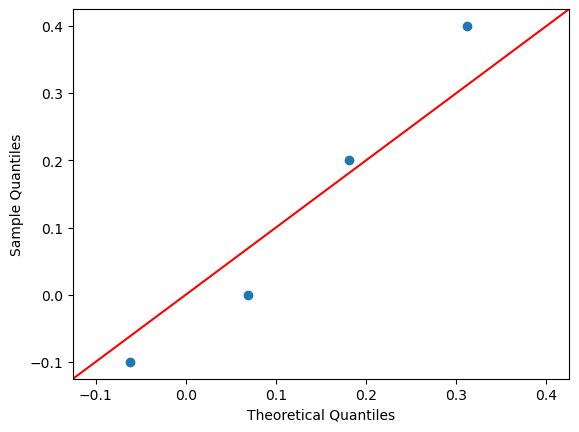

In [34]:
diff.sort_values()
sm.qqplot(diff,line='45',loc=np.mean(diff),scale=np.std(diff,ddof=1))
plt.show()

In [35]:
stats.shapiro(diff)

ShapiroResult(statistic=0.9630723595619202, pvalue=0.7982271313667297)

What is the null and alternative hypothesis?



What is the alpha value and is it a one-sided test or two-sided test?

In [36]:
# The mean difference
mean_diff = np.mean(diff)
std_diff= np.std(diff, ddof=1)
print(mean_diff)
print(std_diff)

0.125
0.22173557826083443


In [37]:
# the test statistic:
Ptest_statistic=mean_diff/(std_diff/np.sqrt(len(Test1)))
Ptest_statistic

1.1274690420042437

In [38]:
# critical t value using alpha=0.05 and df=n-1=3 for a two-sided test
Ct = stats.t.ppf(0.975,3)
print(Ct)

3.182446305284263


In [39]:
LB = mean_diff - Ct*std_diff/np.sqrt(4)
UB = mean_diff + Ct*std_diff/np.sqrt(4)
print(str(LB) + " <= population mean difference <= " + str(UB))

-0.227830785893131 <= population mean difference <= 0.477830785893131


Since the CI does span 0, we can conclude there is not a statistically significant difference.

Calculate the 95% confidence interval for the mean of difference $μ (difference)$

Interpret the confidence interval and make a conclusion for the researcher.

Paired t-test calculations.  \
You can use Python and scipy states stats.t-test realted to run a paired t test

The you can find the t-statistic for the mean difference using the stadard errror of the differences.  This is a one sample t-test where the $\mu$ is 0 for the new set of data (the differences)

In [40]:
#Python use scipy stats.t-test related
stats.ttest_rel(Test1,Test2)

Ttest_relResult(statistic=-1.1274690420042437, pvalue=0.3415759998405409)

In [41]:
# Check with python
import statsmodels.api as sm
import statsmodels as sm
CI_pt=sm.stats.weightstats._tconfint_generic(mean_diff,std_diff/np.sqrt(4),(len(Test1)-1),0.05,alternative='two-sided')
CI_pt

(-0.227830785893131, 0.477830785893131)

In [42]:
t_paired= ((mean_diff)/(std_diff/np.sqrt(4)))
print(t_paired)

1.1274690420042437


You can find the p-value here by finding the probability of finding a t-value of 1.127 using alpha = 0.05 and a two-sided test. 

This is betwee n p=0.15 and p=0.2 by the table for dof=3, so double this is p=0.3 to 0.4.  The exact p-value found was p=0.3416, so we fail to reject the null hypothesis that the mean of differences between the two groups is 0.  

This agrees with the CI above, which it always will.   